# STATISTICS 504 HW #3 <br>
12/04/2015 <br>
Fall 2015 <br>
Erich Seamon <br>
University of Idaho <br>
erichs@uidaho.edu <br>
http://github.com/erichseamon.com/stat504 <br>

# OVERVIEW

Conduct a data analysis for the above two Data Sets #1 and #2 using all you have learned in the semester to cleanup, build, and  compare/contrast the performance (10-CV with AUC- measure) of various models (including variables/features selections, 

1) Null,  
2) NB, <br> 
3) knn, <br> 
4) logistic regression, <br> 
5) SVM Polynomial kernel, <br> 
6) SVM Gaussian kernel, <br> 
7) Tree, 7) Bagging, <br> 
8) Random Forest, <br> 
9) Noisy Replications Ensembling, <br> 
10) plus one feasible model of your choice which was not covered in class). <br> <br> 

Overlay all model ROC curves in one figure for the same data set, with a legend key. Discuss your modeling process, interesting findings, and conclusions.

### DATA1: 

STRONG-R Male Sample_Reduced_2014-03-14.csv (with variables description in  STRONG Codebook.xls). The response variable is FelRecidYr3 (1 versus 0) - Felony recidivism in 3 years.

### DATA2: 

reviews_Musical_Instruments. The response variables is the reviewer’s rating in "overall": 5.0 versus 1.0 (ignore the other in-between ratings of 4.0, 3.0, and 2.0)

### Specifics:

•	Use 10CV mAUC measure to find the optimal model hyper-parameters <br>
•	For SVM, do both the polynomial and Gaussian kernel with the optimal model hyper-meters <br>
•	For Ensembling, do Bagging, Random Forest, and Noisy Replications <br>
•	You probably would have to run these complicated models on Amazon Web Service (AWS) at http://aws.amazon.com/  <br>
•	Measure and report the execution time for running each of these 10 models in Python.   <br>

Make sure that all your Python codes are documented and bug-free-executable, and all your reported results are reproducible. 15% will be deducted from non-executable non-reproducible codes/results.

Finally, please make sure that all your 3 .ipynb Notebooks for Homework#1, #2, and #3 should be in the same Github directory so they can be downloaded in one zip file.


# Homework Organization

All Models are run, first against Data1 (recidivism).  Next, all models are run against Data2 (Music).  Final results (ROC graphs, as well as CV.time.memory graphs) are in the RESULTS section at the end of the document.<br>


##### DATA1 RECIDIVISM<br>

Step1: Data Loading and Feature Extraction<br>
Step2: Feature Selection<br>
Step3: Model Evaluation<br>
* Model 1:Null<br>
* Model 2:NB Multinomial<br>
* Model 3:NB Gaussian<br>
* Model 4:NB Bernoulli<br>
* Model 5:KNN<br>
* Model 6:Logitstic Regression<br>
* Model 7:Decision Tree<br>
* Model 8:Bagged Decision Tree<br>
* Model 9:Random Forest<br>
* Model 10:Bagged Random Forest<br>
* Model 11:Noisy Replication<br>
* Model 12:XXX<br>

##### DATA2 MUSIC<br>

Step1: Data Loading and Feature Extraction<br>
Step2: Feature Selection<br>
Step3: Model Evaluation<br>
* Model 1:Null<br>
* Model 2:NB Multinomial<br>
* Model 3:NB Gaussian<br>
* Model 4:NB Bernoulli<br>
* Model 5:KNN<br>
* Model 6:Logitstic Regression<br>
* Model 7:Decision Tree<br>
* Model 8:Bagged Decision Tree<br>
* Model 9:Random Forest<br>
* Model 10:Bagged Random Forest<br>
* Model 11:Noisy Replication<br>
* Model 12:Etra Tree<br>


##### RESULTS - all data<br>


In [15]:
import matplotlib
%matplotlib nbagg

import json
from pprint import pprint
from pyproj import Proj
import StringIO
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import pydot
from IPython.display import Image
import scipy.sparse as sp
import urllib
import math
import sklearn
import psutil
import sys

from urllib2 import Request, urlopen
import json
from pandas.io.json import json_normalize
import numpy
from sklearn.cross_validation import cross_val_score

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
import time
from memory_profiler import profile

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.feature_selection.univariate_selection import SelectFpr

In [16]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.16.1.


In [17]:
%load_ext memory_profiler

# DATA1 - RECIDIVISM

# STEP 1: DATA LOADING - Recidivism

In [18]:
urllib.urlretrieve('http://webpages.uidaho.edu/~stevel/504/STRONG-R Male Sample_Reduced_2014-03-14.csv', '/git/data/hw3/strong.csv')

('/git/data/hw3/strong.csv', <httplib.HTTPMessage instance at 0x7f54b7f92dd0>)

In [19]:
data1 = pd.read_csv('/git/data/hw3/strong.csv')
data1['FelRecidYr3'].replace('', np.nan, inplace=True)

## Resample to n=5000 for computational purposes

In [20]:
data1 = data1.sample(n=5000)

In [21]:
filter = data1["FelRecidYr3"] != " "
data1 = data1[filter]
data1_a = data1


In [22]:
#data1.drop(data1.columns[FelRecidYr3], axis=1, inplace=True)
y = data1_a.FelRecidYr3.astype(int)
#datanew = data1.drop(data1.FelRecidYr3)
del data1['FelRecidYr3']
del data1['Unnamed: 338']
del data1['Unnamed: 339']
del data1['Unnamed: 340']


In [23]:
#feature_cols2 = ['AgeAsses3RN', 'AgeAtFirstConvR', 'JvFelCon', 'JvVioCon', 'JvComit', 'HomConv', 'SexConv', 'VProCon', 'AssaCon', 'DomVio', 'CopFodNd3', 'CopBugNd3', 'CopTraNd3', 'CopHygNd3', 'CopMedNd3', 'CopMHNd3']
#data1.drop(data1.columns["FelrecidYr3"], axis=1)
X = data1
#y = data1_a.FelRecidYr3.astype(int)
#y = pd.DataFrame(strongy)
Xrecid = X
yrecid = y

# STEP 2: FEATURE SELECTION - Recidivism

## Of all the possible feature variables, which ones are the most important?  Picking the best 10 features from Recidivism dataset

### Using two methods: 

Random Forest with feature importance <br>
Using Univariate Kbest selection - and rank by pvalue


## Use random forest to score all the features

In [24]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X, y)
#rf_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
#rf_auc_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

<IPython.core.display.Javascript object>


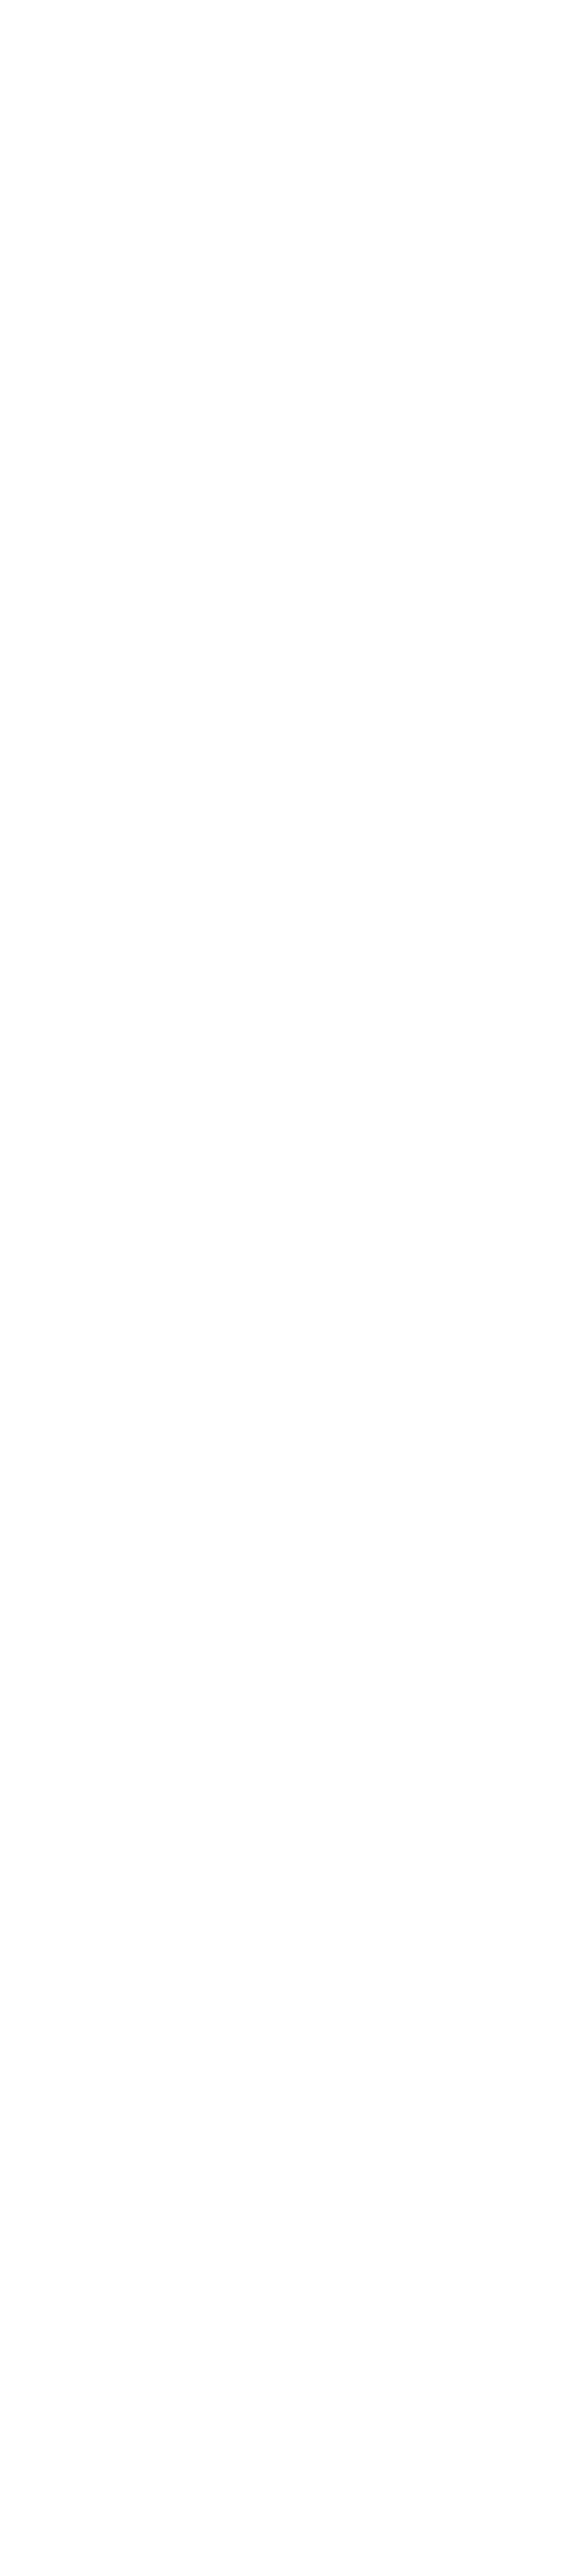

In [25]:
import matplotlib
%matplotlib nbagg

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort(ascending=True)
feature_importances.plot(kind="barh", figsize=(11,50));

### Random Forest determined lowest to most important features

In [26]:
feature_importances[:]

#feature_importances.sort_index(ascending=True)

DrgSuPrs3             0.000031
AgChBizB3             0.000057
MHSuProv3             0.000059
SexInfrac             0.000065
FamCfTPA3             0.000098
STGStatus             0.000115
FPAHpHos3             0.000116
MHSuL6At3             0.000124
FamHpHos3             0.000146
EmBrEdu3              0.000192
HomConv               0.000214
DrgSuFRx3             0.000218
EmFiRPP3              0.000218
AtRsBost3             0.000223
FamCfODV3             0.000239
AgMoHosW3             0.000254
EmBrCCI3              0.000266
AgChFrSe3             0.000284
AgChAnCr3             0.000288
FamCfDV3              0.000310
FPACfPDV3             0.000330
FamMCOVc3             0.000343
ResCuRTx3             0.000368
FamPrEmp3             0.000389
AgChFxUR3             0.000400
FPAInEna3             0.000422
AgMoHate3             0.000427
MHSuL6Co3             0.000445
FPAPbPMH3             0.000459
FamMCCOP3             0.000506
                        ...   
AgeUse3               0.006652
TechVioP

### Determining top features thru the use of Kbest selection (Univariate)

In [27]:
topfeatures = SelectKBest(chi2, k=all)

In [28]:
topfeatures = SelectFpr(chi2, alpha=0.05)

### Graph showing p values from feature selection/importance model, with .05 cutoff

<IPython.core.display.Javascript object>


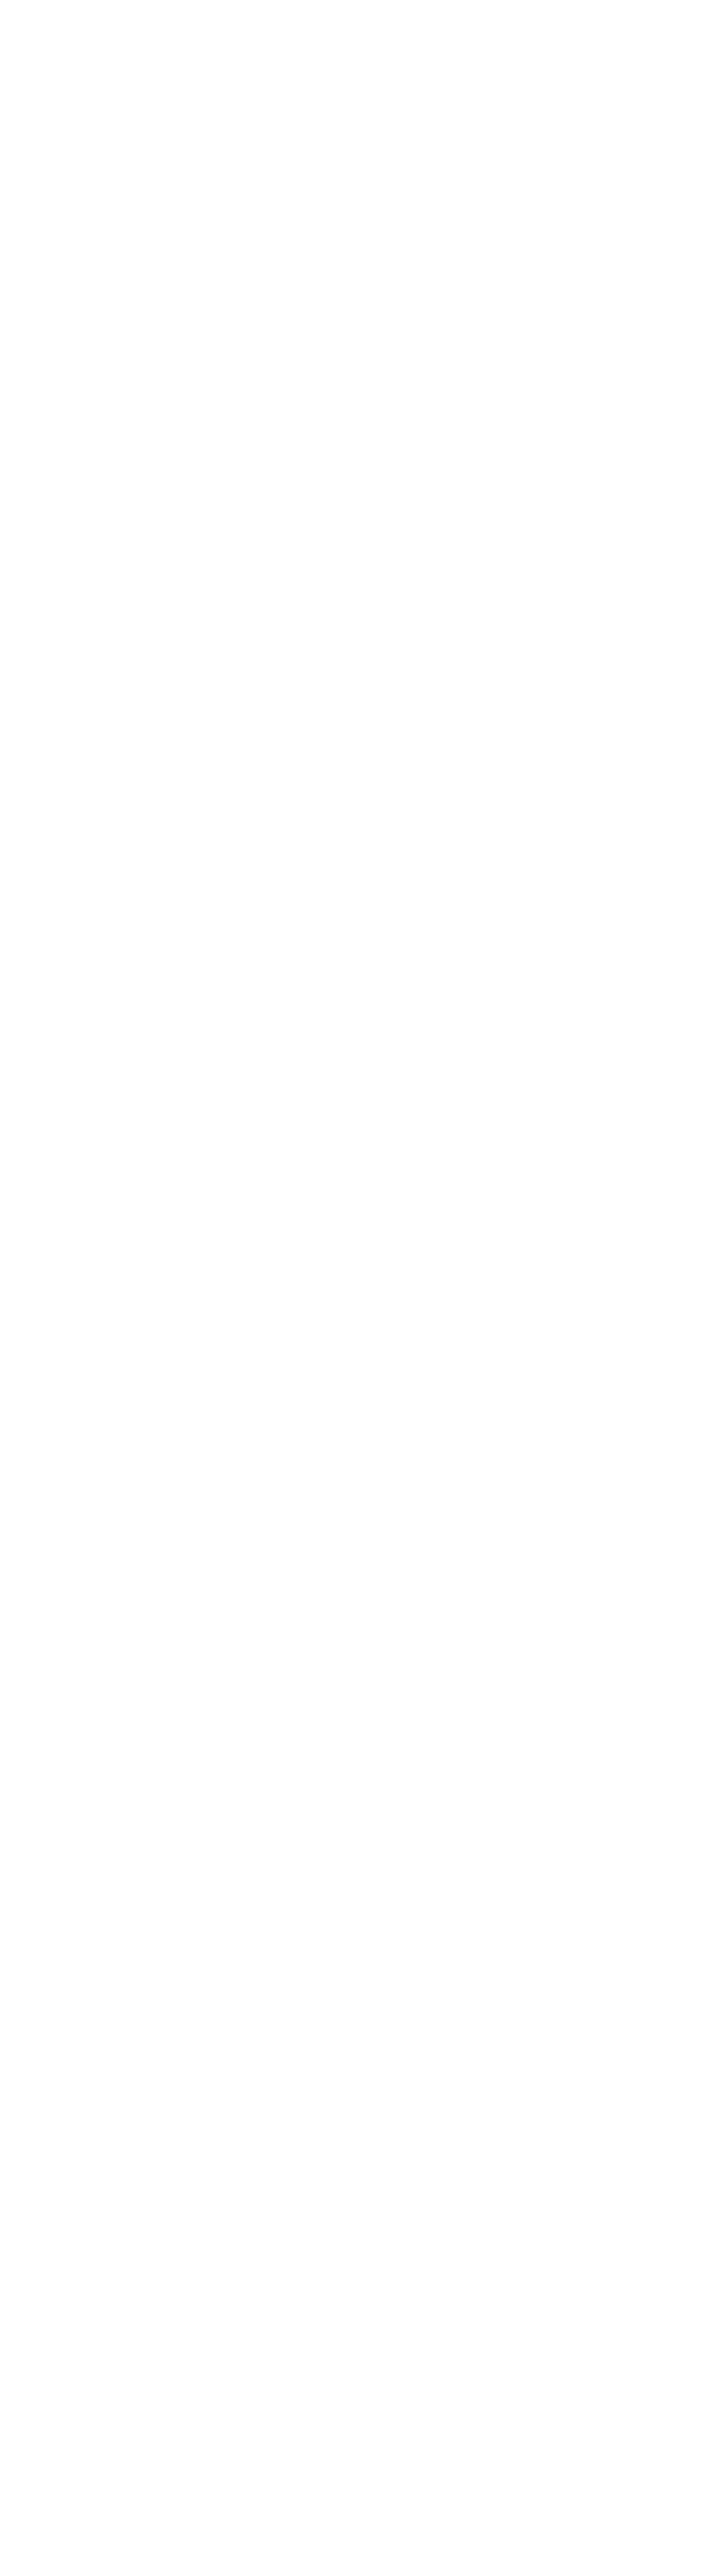

In [29]:
import matplotlib
%matplotlib nbagg

import pylab as pl

#pl.figure(1)
#pl.clf()

x_indices = np.arange(X.shape[-1])

selector = SelectFpr(f_classif, alpha=0.05)
selector.fit(X, y)
#scores = -np.log10(selector.pvalues_)
#scores /= scores.max()

tindex = pd.Series(selector.pvalues_, index=X.columns)
tindex.sort()
tindex.plot(kind="barh", figsize=(11,40));
plt.axvline(x=0.05, ymin=0, ymax = 5, linewidth=1, color='red')

#pl.bar(index, selector.pvalues_, width=1, color='red')
#plt.axhline(y=.05, xmin=0, xmax=350, linewidth=1, color = 'blue')

### Top features, with p-values below .05

In [30]:
b = selector.pvalues_ < .05
b = pd.DataFrame(b)
b.rename(columns={0: 'sig'}, inplace=True)

Xcol = pd.DataFrame(X.columns)
bresult = pd.concat([b, Xcol], axis=1)
bresult.rename(columns={0: 'name'}, inplace=True)
bresult2 = bresult.loc[bresult['sig'] == True]

In [31]:
bresult2

sig                 name
0    True          AgeAsses3RN
1    True      AgeAtFirstConvR
2    True             JvFelCon
3    True             JvVioCon
4    True              JvComit
6    True              SexConv
7    True              VProCon
11   True              FelProp
12   True              DrugCon
13   True              EscpCon
14   True              MisAssa
15   True              MisdDom
18   True              MisWeap
19   True             MisdProp
20   True             MisdDrug
21   True             MisdEscp
23   True   TotalAdultFelonies
24   True       LastConviction
25   True       TechVioPriorsR
26   True         CountInfracR
27   True      CountVioInfracR
28   True     CountInfracEverR
29   True  CountVioInfracEverR
30   True        SeriousInfrac
31   True    SeriousInfracEver
33   True        SexInfracEver
34   True            STGStatus
35   True       YearlyVisitsMR
36   True      RelToSuperFromD
37   True        CChangeCurrRN
..    ...                  ...
301  True            AtChNdTh3
302  True            AtChDecS3
303  True            AtChDecG3
304  True             AtChSup3
305  True            AtChPara3
307  True            AtChCHea3
308  True            AtChFaPr3
309  True            AtChFaRe3
310  True            AtChCrDi3
311  True             AtRsL63R
312  True             AtRsSup3
314  True            AtRsDInR3
315  True            AtRsDCoR3
316  True             AtRsNBR3
317  True            AtRsCrUs3
319  True             AttAuth3
320  True             RespOth3
321  True            Readychg3
322  True             BelfSuc3
323  True             ConsThk3
324  True             ImpCont3
325  True             DealOth3
326  True             ProbSol3
327  True            CopLv3MRV
328  True            CopEmpNd3
329  True            CopHouNd3
330  True            CopCloNd3
331  True            CopFodNd3
332  True            CopBugNd3
333  True            CopTraNd3

[183 rows x 2 columns]

In [32]:
bresult3 = bresult2["name"].tolist()

In [33]:

#feature_cols2 = ['RespOth3', 'EDQuitExpell', 'EduGdCom3N', 'FelProp', 'AgeAsses3RN', 'EmpLeng3R', 'AgeAtFirstConvR', 'FrnAnti3RC', 'TotalAdultFelonies', 'LastConviction']
#data1.drop(data1.columns["FelrecidYr3"], axis=1)
X = data1[bresult3]
#y = data1_a.FelRecidYr3.astype(int)
#y = pd.DataFrame(strongy)


## run train test split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# STEP 3 : MODEL EVALUATION - Recidivism

### MODEL 1: Comparing Test Accuracy with Null Accuracy

Null accuracy is the accuracy that could be achieved by always predicting the most frequent class. It is a benchmark against which you may want to measure your classification model.


In [35]:
# examine the class distribution
y_test.value_counts()

0    476
1    209
dtype: int64

In [36]:
import time
start = time.time()

nulltime1 = %%timeit -o 1 + 2
# calc the null accuracy
y_test.value_counts().head(1) / len(y_test)

end = time.time()
nulltime1 = end - start
print nulltime1

10000000 loops, best of 3: 29.7 ns per loop
1.22933101654


In [37]:
nullmodel = sklearn.dummy.DummyClassifier(strategy='most_frequent', random_state=99, constant=None)

In [38]:
nullmodel.fit(X,y)

DummyClassifier(constant=None, random_state=99, strategy='most_frequent')

In [39]:
y_pred_prob = nullmodel.predict_proba(X_test)[:, 1]

In [40]:
# calculate AUC
print metrics.roc_auc_score(y_test, y_pred_prob)

0.5


<IPython.core.display.Javascript object>


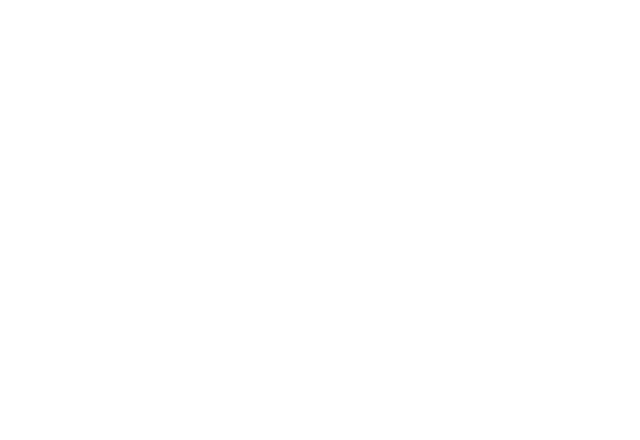

In [41]:
import matplotlib
%matplotlib nbagg
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)


In [42]:
nullmodel_mean1 = cross_val_score(nullmodel, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

In [43]:
nullmodel_scores1 = cross_val_score(nullmodel, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')

### MODEL 2: Naive-Bayes

### MODEL 2: Naive-Bayes - Multinomial Naive Bayes

In [44]:
import time
start = time.time()

from sklearn.naive_bayes import MultinomialNB
nbm = MultinomialNB()
nbm.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nbm_scores = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
nbmtime1 = end - start
print nbmtime1

0.147480964661


In [45]:
print nbm_scores

[ 0.68978102  0.68613139  0.68248175  0.72262774  0.68248175  0.6459854
  0.70437956  0.69343066  0.68978102  0.73626374]


In [46]:
nbm_scores_mean1 = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbm_scores_mean1

0.694040266303


In [47]:
nbm_scores_auc1 = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbm_scores_auc1

0.705023655099


In [48]:
mean_score = nbm_scores.mean()
std_dev = nbm_scores.std()
std_error = nbm_scores.std() / math.sqrt(nbm_scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Multinomial NB Score is %f +/-  %f" % (mean_score, ci)
print "Multinomial NB AUC is "
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Multinomial NB Score is 0.693334 +/-  0.016588
Multinomial NB AUC is 
95 percent probability that if this experiment were repeated over and over the average score would be between 0.676747 and 0.709922


### MODEL 2: Naive-Bayes - Gaussian Naive Bayes

In [49]:
import time
start = time.time()

from sklearn.naive_bayes import GaussianNB
nbg = GaussianNB()
nbg.fit(X, y)
GaussianNB()
nbg_scores = cross_val_score(nbg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print nbg_scores

end = time.time()
nbgtime1 = end - start
print nbgtime1

[ 0.67153285  0.64963504  0.68978102  0.67883212  0.68613139  0.73722628
  0.70072993  0.7189781   0.64963504  0.6996337 ]
0.196593046188


In [50]:
nbg_scores_mean1 = cross_val_score(nbg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbg_scores_mean1

0.688207534558


In [51]:
nbg_scores_auc1 = cross_val_score(nbg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbg_scores_auc1

0.689316448652


### MODEL 2: Naive-Bayes - Bernoulli Naive Bayes

In [52]:
import time
start = time.time()

from sklearn.naive_bayes import BernoulliNB
nbb = BernoulliNB()
nbb.fit(X, y)
BernoulliNB(alpha=1.0, class_prior=None, fit_prior=True)
nbb_scores = cross_val_score(nbb, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print nbb_scores

end = time.time()
nbbtime1 = end - start
print nbbtime1

[ 0.67883212  0.66423358  0.64233577  0.62773723  0.67883212  0.67518248
  0.71532847  0.7080292   0.68613139  0.66666667]
0.251977920532


In [53]:
nbb_scores_mean1 = cross_val_score(nbb, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbb_scores_mean1

0.674695863747


In [54]:
nbb_scores_auc1 = cross_val_score(nbb, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbb_scores_auc1

0.712938786378


### MODEL 2: Naive-Bayes - Best performing Naive Bayes??

<IPython.core.display.Javascript object>


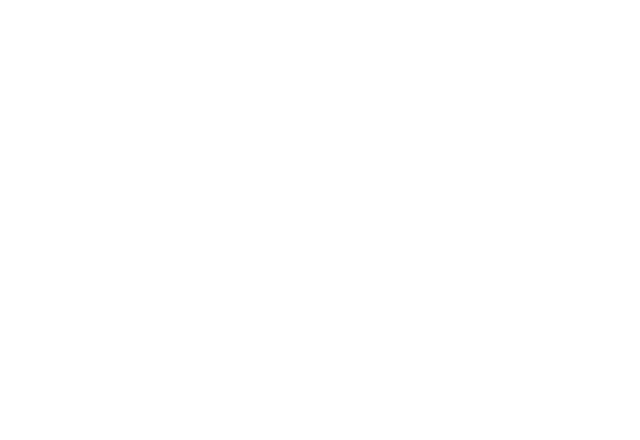

In [55]:
# TASK 7: plot the ROC curve
import matplotlib
%matplotlib nbagg
from sklearn import metrics
import pandas as pd
from ggplot import *


nbm_preds = nbm.predict_proba(X_test)[:,1]
nbm_fpr, nbm_tpr, _ = metrics.roc_curve(y_test, nbm_preds)

nbg_preds = nbg.predict_proba(X_test)[:,1]
nbg_fpr, nbg_tpr, _ = metrics.roc_curve(y_test, nbg_preds)

nbb_preds = nbb.predict_proba(X_test)[:,1]
nbb_fpr, nbb_tpr, _ = metrics.roc_curve(y_test, nbb_preds)

plt.plot(nbm_fpr, nbm_tpr, color='green')
plt.plot(nbg_fpr, nbg_tpr, color='magenta')
plt.plot(nbb_fpr, nbb_tpr, color='yellow')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')


### Multinomial NB was the best performing NB with an AUC of 68%.  (green ROC above)

### MODEL3: KNN

In [56]:
knn = KNeighborsClassifier(n_neighbors=9)
#strongy = data1.FelRecidYr3
knn.fit(X,y)
knn_scores = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

In [57]:
print knn_scores

[ 0.7080292   0.7080292   0.73357664  0.69343066  0.72992701  0.68978102
  0.71167883  0.76642336  0.66788321  0.75824176]


In [58]:
# use average accuracy as an estimate of out-of-sample accuracy
knn_scores_mean1 = knn_scores.mean()
print knn_scores_mean1

0.716700088233


In [59]:
knn_scores_auc = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print knn_scores_auc

0.676254393687


In [60]:
# search for an optimal value of K for KNN
k_range = range(1, 100)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_scores = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    k_scores.append(knn_scores.mean())
print k_scores

[0.66595545573647763, 0.70719365792358491, 0.69659768455388893, 0.71521884441592465, 0.70133552578808056, 0.71631908237747655, 0.71741129916312407, 0.71596080318708055, 0.71194486778428379, 0.72107296596347692, 0.72289778348172506, 0.72399133713002328, 0.72836956231116823, 0.72617176011336593, 0.72690569770861746, 0.72397262105291316, 0.72435630063367296, 0.72289377289377299, 0.72946846341006932, 0.72945776850886346, 0.72765166706772544, 0.72543381193016232, 0.72253950429132907, 0.72691906633512471, 0.7287331889521671, 0.72363305793962729, 0.72764498275447187, 0.72472126413732252, 0.72910082618111827, 0.72581882837357292, 0.72983877436432176, 0.72836020427261305, 0.72509023822892427, 0.72800593567016914, 0.72580813347236706, 0.72690569770861735, 0.72982807946311579, 0.73019170610411488, 0.72582016523622372, 0.7291141948076254, 0.73128793347771448, 0.7287331889521671, 0.72652068126520697, 0.72726531376166414, 0.72726264003636265, 0.72727066121226713, 0.72835351995935937, 0.7269030239833

<IPython.core.display.Javascript object>


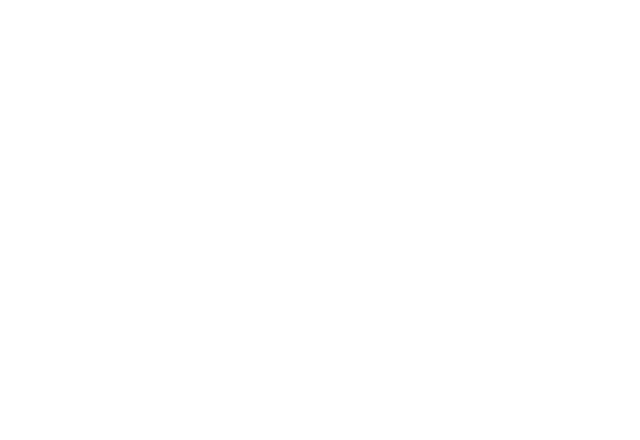

In [61]:
import matplotlib
%matplotlib nbagg

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### MODEL3: KNN - Re-run KNN model with optimized K = 40

In [62]:
import time
start = time.time()

knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X,y)
#strongy = data1.FelRecidYr3
knn_scores = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
knntime1 = end - start

In [63]:
import math
mean_score = knn_scores.mean()
std_dev = knn_scores.std()
std_error = knn_scores.std() / math.sqrt(knn_scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.725078 +/-  0.022993
95 percent probability that if this experiment were repeated over and over the average score would be between 0.702085 and 0.748071


In [64]:
# use average accuracy as an estimate of out-of-sample accuracy
knn_mean1 = knn_scores.mean()

### MODEL 4: Logistic Regression

#### MODEL 4: Logistic Regression - 10-fold cross-validation with logistic regression

In [65]:
import time
start = time.time()

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)
logreg_scores = cross_val_score(logreg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
logregtime1 = end - start

#### MODEL 4: Logistic Regression - Print Logistic Regression cross validation accuracy scores

In [66]:
print logreg_scores

[ 0.72992701  0.77372263  0.72992701  0.69708029  0.72627737  0.70072993
  0.68613139  0.74817518  0.72992701  0.70695971]


#### MODEL 4: Logistic Regression - Print Logistic Regression cross validation accuracy score - mean

In [67]:
logreg_mean1 = cross_val_score(logreg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

#### MODEL 4: Logistic Regression - Print Logistic Regression cross validation auc score - mean

In [68]:
logreg_auc_scores = cross_val_score(logreg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()

In [69]:
print logreg_auc_scores.mean()

0.707613120784


In [70]:
mean_score = logreg_scores.mean()
std_dev = logreg_scores.std()
std_error = logreg_scores.std() / math.sqrt(logreg_scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.722886 +/-  0.017733
95 percent probability that if this experiment were repeated over and over the average score would be between 0.705153 and 0.740618


### MODEL 5: SVM Polynomial Kernel

#### MODEL 5: SVM Polynomial Kernel - 10-fold cross-validation with SVM Poly

In [71]:
# 10-fold cross-validation with SVM Polynomial
from sklearn import svm
svmpoly = svm.SVC(kernel='poly', gamma=2)
svmpoly.fit(X,y)
svmpoly_scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print svmpoly_scores

[ 0.70072993  0.70437956  0.67153285  0.68978102  0.69708029  0.67518248
  0.68248175  0.68613139  0.65693431  0.67765568]


#### MODEL 5: SVM Polynomial Kernel - Search for an optimal gamma/depth for SVM Polynomial

In [72]:
# search for an optimal gamma for SVM Polynomial
g_range = range(1, 10)
g_scores = []
for k in g_range:
    svmpoly = svm.SVC(kernel='poly', gamma=k)
    scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    g_scores.append(scores.mean())
print g_scores

[0.68636934841314412, 0.681628833453651, 0.68491617871179922, 0.6816301703163018, 0.68819817651934445, 0.68929975134354693, 0.68782118125183822, 0.68784524477955133, 0.69804951739258314]


<IPython.core.display.Javascript object>


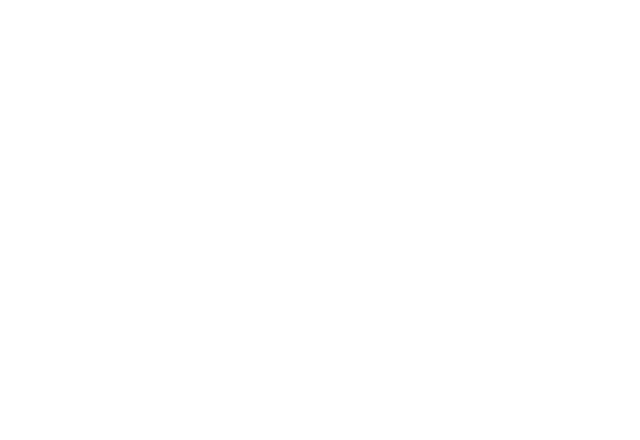

In [73]:
import matplotlib
%matplotlib nbagg

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(g_range, g_scores)
plt.xlabel('Value of G')
plt.ylabel('Cross-Validated Accuracy')

## 10-fold cross-validation with SVM Polynomial - optimized

In [74]:
import time
start = time.time()

from sklearn import svm
svmpoly = svm.SVC(kernel='poly', gamma=1)
svmpoly.fit(X,y)
svmpoly_scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
svmpolytime1 = end - start

In [75]:
svmpoly_mean1 = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print svmpoly_mean1

0.688577845512


### MODEL 5: SVM Gaussian Kernel

In [76]:
from sklearn import svm
svmrbf = svm.SVC(kernel='rbf', gamma=2)
svmrbf.fit(X,y)
svmrbf_scores = cross_val_score(svmrbf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print svmrbf_scores

[ 0.7080292   0.71532847  0.6459854   0.7189781   0.69708029  0.7080292
  0.76642336  0.71532847  0.69708029  0.67765568]


In [77]:
g_range = range(1, 10)
g_scores = []
for k in g_range:
    svmg = svm.SVC(kernel='poly', gamma=k)
    scores = cross_val_score(svmg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    g_scores.append(scores.mean())
print g_scores

[0.6929600812812492, 0.69186786449560178, 0.68929173016764245, 0.68820619769524882, 0.68783053929039339, 0.68527044731424291, 0.69148819550279417, 0.68602310098660468, 0.6765260287158098]


<IPython.core.display.Javascript object>


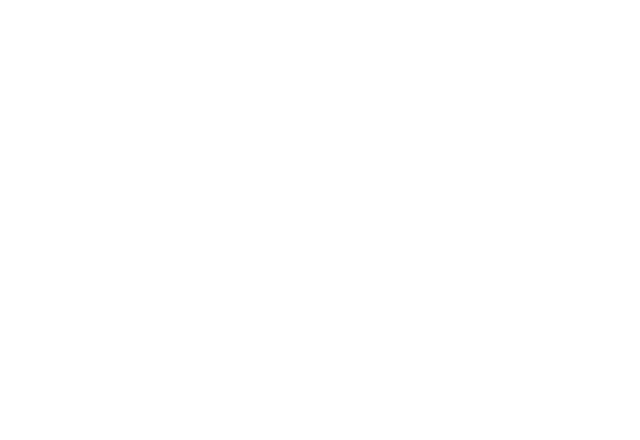

In [78]:
import matplotlib
%matplotlib nbagg

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(g_range, g_scores)
plt.xlabel('Value of G')
plt.ylabel('Cross-Validated Accuracy')

## MODEL 5: SVM Gaussian Kernel optimized

In [79]:
import time
start = time.time()

from sklearn import svm
svmrbf = svm.SVC(kernel='rbf', gamma=6)
svmrbf.fit(X,y)
svmrbf_scores = cross_val_score(svmrbf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
svmgaustime1 = end - start

### MODEL 6: Decision Tree

#### MODEL 6: Decision Tree - Initial Decision Tree with max depth of 10

In [80]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(X,y)
clf_scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

#### MODEL 6: Decision Tree - Print Decision Tree cross validation accuracy scores

In [81]:
print clf_scores

[ 0.68978102  0.67518248  0.68613139  0.75547445  0.67518248  0.65693431
  0.67883212  0.64233577  0.60948905  0.67765568]


#### MODEL 6: Decision Tree -  Print Decision Tree cross validation accuracy score - mean

In [82]:
clf_scores_mean1 = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print clf_scores_mean1

0.674694526884


#### MODEL 6: Decision Tree - Print Decision Tree cross validation auc score - mean

In [83]:
clf_scores_auc = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print clf_scores_auc

0.583107662722


#### MODEL 6: Decision Tree - Save and print graphic of Decision Tree

In [84]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

In [85]:
graph.write_jpeg("hw3_tree_plot.jpg")

True

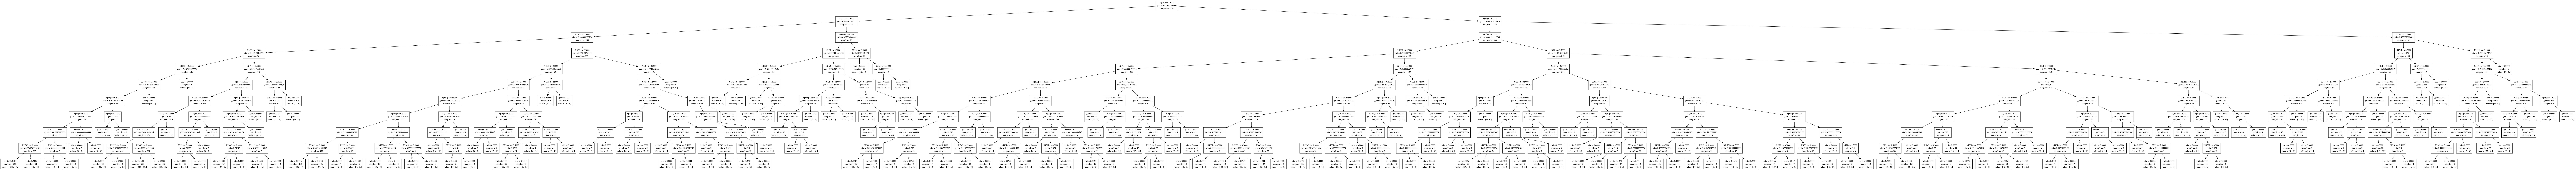

In [86]:
from IPython.display import Image
Image(filename='hw3_tree_plot.jpg')

### MODEL 6: Decision Tree - search for an optimal gamma/depth for Decision Tree

In [87]:
t_range = range(1, 50)
t_scores = []
for k in t_range:
    clf = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    t_scores.append(scores.mean())
print t_scores

[0.70501724552819445, 0.7250808801903692, 0.71193952033368091, 0.69954947728670347, 0.69260313895350401, 0.69404026630304005, 0.70062297799524076, 0.68968075719900535, 0.68710863345899842, 0.66922007432956332, 0.6637416111868667, 0.66190075131680959, 0.65607737761022444, 0.66045025534076629, 0.64001898344964048, 0.65280741156653577, 0.63782251811448876, 0.64149755354134919, 0.64476350899708568, 0.64293601775353593, 0.6582511162803133, 0.6327143659260448, 0.63892542980134226, 0.637100612283094, 0.64329429694393203, 0.63966471484719656, 0.62285500387690163, 0.6411031790593833, 0.65900510681532587, 0.64658565279003244, 0.63710194914574481, 0.64550145718028928, 0.63783856046629761, 0.63745889147349, 0.62906606775219909, 0.63379588781048635, 0.64622336301168415, 0.64330766557043928, 0.64292799657763167, 0.63308066629234516, 0.6228643619154568, 0.63927702467848457, 0.63599235314563773, 0.62943771556910255, 0.63452982540573777, 0.64181973744017529, 0.63270901847544181, 0.63708858051923745, 0.

### MODEL 6: Decision Tree - Plot accuracy of cross validation runs vs. values of depth

<IPython.core.display.Javascript object>


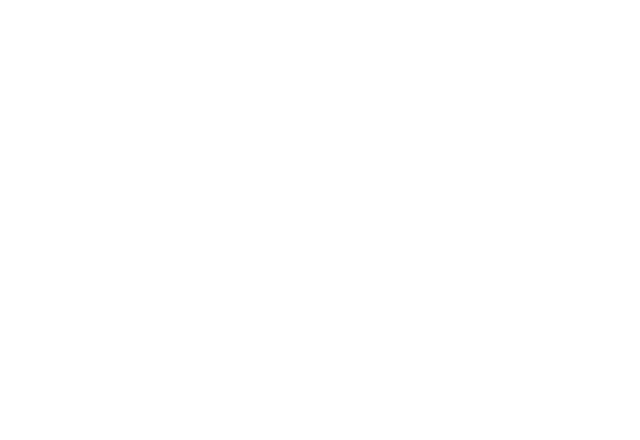

In [88]:
import matplotlib
%matplotlib nbagg
plt.plot(t_range, t_scores)
plt.xlabel('Value of Depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

### MODEL 6: Decision Tree - Model optimization results:

After examining accuracy for a variety of depths, its appears that a value of ~24 for a max depth is optimal in terms of cross validation accuracy.

### MODEL 6: Decision Tree - Re-run Decision Tree model with optimized Depth = 1

In [89]:
import time
start = time.time()

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(X,y)
clf_scores_mean1 = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
clftime1 = end - start

In [90]:
clf_mean1 = clf_scores_mean1

In [91]:
print clf_mean1

0.704983823962


### MODEL 7: Bootstrap Aggregation using Decision Tree

In [92]:
bag_scores = []

bag_range = range(1, 50)

for k in bag_range:
    bag_clf = BaggingClassifier(clf, n_estimators=k, max_samples=1.0, bootstrap = False, bootstrap_features = True, random_state=42)
    bag_clf.fit(X, y)
    bag_clf_scores = cross_val_score(bag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    bag_scores.append(bag_clf_scores.mean())

<IPython.core.display.Javascript object>


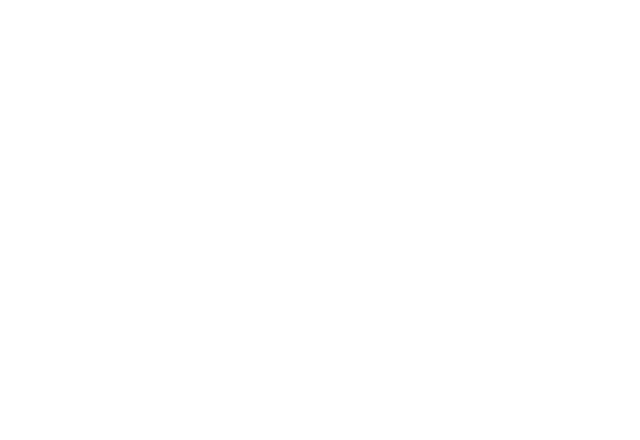

In [93]:
import matplotlib
%matplotlib nbagg
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(bag_range, bag_scores)
plt.xlabel('bag range')
plt.ylabel('Cross validated accuracy')

## MODEL 8: Bagged Decision Tree - Optimized

In [94]:
import time
start = time.time()

bag_clf = BaggingClassifier(clf, n_estimators=15, max_samples=1.0, bootstrap = False, bootstrap_features = True, random_state=42)
bag_clf.fit(X, y)
bag_clf_scores = cross_val_score(bag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
bagclftime1 = end - start

In [95]:
print bag_clf_scores

0.704990508275


### MODEL 8: Random Forest

In [96]:
rf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)
rf.fit(X, y)
rf_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
#rf_auc_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')

In [97]:
print rf_scores

[ 0.74087591  0.73357664  0.67518248  0.74817518  0.68978102  0.7810219
  0.71167883  0.78467153  0.72262774  0.72161172]


In [98]:
print rf_scores.mean()

0.730920296249


In [99]:
rf.oob_score_

0.71558963125228181

In [100]:
#y_oob = rf.oob_prediction_
#print "c-stat: ", roc_auc_score(y, y_oob)

### MODEL 8: Random Forest - Find optimal number of leaves

In [101]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
for min_samples in min_samples_leaf_options:
    rf = RandomForestClassifier(n_estimators=100, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    rf.fit(X, y)
    print min_samples, "min samples"
    roc = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    print "C-stat: ", roc
    results.append(roc)
    print ""

1 min samples
C-stat:  0.733324723305

2 min samples
C-stat:  0.739968580504

3 min samples
C-stat:  0.740956023709

4 min samples
C-stat:  0.738481865293

5 min samples
C-stat:  0.736711877951

6 min samples
C-stat:  0.740023932258

7 min samples
C-stat:  0.7378495696

8 min samples
C-stat:  0.739618854512

9 min samples
C-stat:  0.737548693981

10 min samples
C-stat:  0.737155415826

11 min samples
C-stat:  0.740220936317

12 min samples
C-stat:  0.738122111085

13 min samples
C-stat:  0.738287566968

14 min samples
C-stat:  0.737681810697

15 min samples
C-stat:  0.735240307628

16 min samples
C-stat:  0.740609743812

17 min samples
C-stat:  0.739094246386

18 min samples
C-stat:  0.737782987622

19 min samples
C-stat:  0.736875953607

20 min samples
C-stat:  0.739902373333

21 min samples
C-stat:  0.737832832506

22 min samples
C-stat:  0.742667172496

23 min samples
C-stat:  0.736197946175

24 min samples
C-stat:  0.740383671104

25 min samples
C-stat:  0.736795307144



### MODEL 8: Random Forest - Determine optimal depth for Random Forest

In [102]:
t_range = range(1, 50)
t_scores = []
for k in t_range:
    clf = RandomForestClassifier(max_depth=k)
    scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    t_scores.append(scores.mean())
print t_scores

[0.70502125611614663, 0.72290580465762955, 0.71924681158257797, 0.71888986925483267, 0.72324269404561381, 0.72399000026737259, 0.72178551375631661, 0.73020641159327293, 0.72143124515387291, 0.71121494077698455, 0.70828587470923243, 0.70720034223683859, 0.70354268602443792, 0.7170463356594744, 0.70572845645838345, 0.71084997727333488, 0.70573246704633563, 0.71194486778428379, 0.70209219004839452, 0.71486190208817946, 0.7093927969840379, 0.71193818347103011, 0.7119448677842839, 0.71193818347103011, 0.70353867543648574, 0.72215047725996639, 0.71012272399133713, 0.71340338493623157, 0.71304243202053419, 0.71777492580412283, 0.7239846528167696, 0.71412529076762643, 0.71157455683003135, 0.71704767252212509, 0.72035774444533573, 0.72253683056602758, 0.71815994224753354, 0.71009999732627471, 0.71816528969813642, 0.71157054624207905, 0.73202721852356878, 0.70427394989438785, 0.7130397582952327, 0.71740862543782247, 0.7115571776155718, 0.71231918932648852, 0.70828988529718462, 0.7137576535386754

<IPython.core.display.Javascript object>


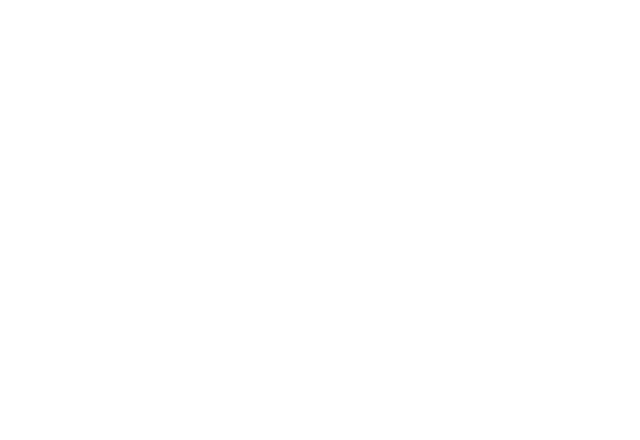

In [103]:
import matplotlib
%matplotlib nbagg
plt.plot(t_range, t_scores)
plt.xlabel('Max Depth')
plt.ylabel('Cross Validated Accuracy')

### MODEL 8: Random Forest - optimize for max number of features

In [104]:
import matplotlib
%matplotlib nbagg

results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=44, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    roc = cross_val_score(model, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    print max_features, "option"
    print "C-stat: ", roc
    results.append(roc)
    print ""
    

auto option
C-stat:  0.723453822135

None option
C-stat:  0.718363963858

sqrt option
C-stat:  0.723541217646

log2 option
C-stat:  0.722912355407

0.9 option
C-stat:  0.721001403941

0.2 option
C-stat:  0.728673736244



### MODEL 8: Re-Run Random Forest after optimization of all hyperparameters

In [105]:
import time
start = time.time()

rf = RandomForestClassifier(n_estimators=44, max_features=.2, max_depth=40,  oob_score=True, min_samples_leaf=11, random_state=42)
rf.fit(X, y)
rf_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
rftime1 = end - start

In [106]:
rf_mean1 = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print rf_mean1

0.734207641507


## MODEL 9: Bagged Random Forest (using optimized parameters from above)

In [107]:
rfbag_range = range(1, 20)
rfbag_scores = []

for k in rfbag_range:
    rfbag_clf = RandomForestClassifier(n_estimators=k, max_features=.2, max_depth=40,  oob_score=True, min_samples_leaf=11, random_state=42)
    rfbag_clf.fit(X, y)
    rfbag_clf_scores = cross_val_score(rfbag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    rfbag_scores.append(rfbag_clf_scores.mean())


/usr/local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [108]:
print rfbag_clf_scores

[ 0.7810219   0.71532847  0.72627737  0.72992701  0.75182482  0.75547445
  0.73722628  0.68978102  0.73357664  0.69230769]


<IPython.core.display.Javascript object>


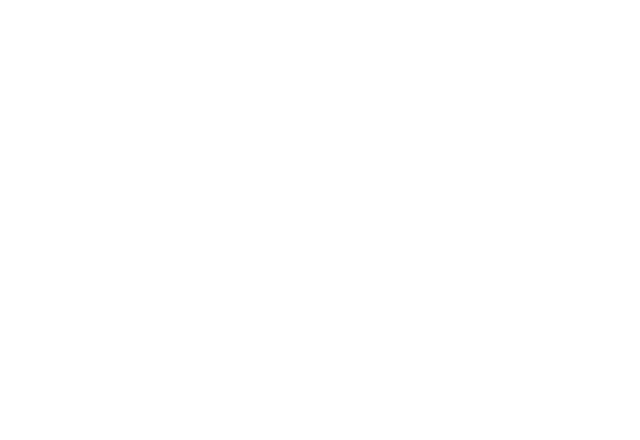

In [109]:
import matplotlib
%matplotlib nbagg

plt.plot(rfbag_range, rfbag_scores)
plt.xlabel('N estimators')
plt.ylabel('Cross validated accuracy')

In [110]:
import time
start = time.time()

rfbag_clf = RandomForestClassifier(n_estimators=21, max_features=.2, max_depth=40,  oob_score=True, min_samples_leaf=11, random_state=42)
rfbag_clf.fit(X, y)
rfbag_clf_scores = cross_val_score(rfbag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
rfbagtime1 = end - start

In [111]:
print rfbag_clf_scores

0.731301302104


## MODEL 10: Extra Tree Classifier

In [112]:
import time
start = time.time()

from sklearn.ensemble import ExtraTreesClassifier
etree = ExtraTreesClassifier(random_state = 40, min_samples_split=1, bootstrap = True, max_depth = 7)
etree.fit(X,y)
ettime1 = time.time()
et_scores = cross_val_score(etree, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring = 'accuracy').mean()

end = time.time()
ettime1 = end - start

In [113]:
import matplotlib
%matplotlib nbagg

import json
from pprint import pprint
from pyproj import Proj
import StringIO
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import pydot
from IPython.display import Image
import scipy.sparse as sp
import urllib
import math
import sklearn
import psutil
import sys

from urllib2 import Request, urlopen
import json
from pandas.io.json import json_normalize
import numpy
from sklearn.cross_validation import cross_val_score

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
import time
from memory_profiler import profile

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.feature_selection.univariate_selection import SelectFpr

# DATA2 - MUSIC

# STEP 1: DATA LOADING - Music

In [114]:
urllib.urlretrieve('http://www.webpages.uidaho.edu/erichs/music.json', '/git/data/hw3/music.json')

('/git/data/hw3/music.json', <httplib.HTTPMessage instance at 0x7f54a5c4dea8>)

In [115]:
with open('/git/data/hw3/music.json', 'rU') as f:
    data = [json.loads(row) for row in f]
    data2 = pd.DataFrame(data)

## What variables are appropriate to be used as features?

In [116]:
data2[:1]

asin helpful  overall  \
0  0006428320  [0, 0]        3   

                                          reviewText   reviewTime  \
0  The portfolio is fine except for the fact that...  03 11, 2014   

       reviewerID reviewerName        summary  unixReviewTime  
0  A1YS9MDZP93857  John Taylor  Parts missing      1394496000

#### Comment: from the fields above, 'helpful', 'overall', 'reviewText', 'unixReviewTime' are useful fields.  

FEATURE VARIABLES:

Helpfulness index - helpful index - represents a ratio - numerator is the number of people who rated this review
positively, with the denominator representing the total number of people who rated this review.

reviewText - main text of the review

Summary - a summary sentence of the review, provided by the reviewer.


RESPONSE VARIABLES:

Overall - overall ranking of review

# STEP 2: FEATURE SELECTION - Music

## Converting helpfulness rating into a percentage

In [117]:
helpfulness_ratio = data2.helpful.tolist()
helpfulness_ratio_final = pd.DataFrame(helpfulness_ratio)

In [118]:
helpfulness_ratio_final['helpfulness_ratio'] = helpfulness_ratio_final[0] / helpfulness_ratio_final[1]

## Preparing X and y: adding helpfulness ratio as a column, eliminating rows where helpfulness ratio is NAN.

In [119]:
data2 = pd.DataFrame(data)
data2 = pd.concat([data2, helpfulness_ratio_final], axis=1)
feature_cols = ['helpfulness_ratio', 'reviewText', 'unixReviewTime', 'summary', 'overall']
#feature_cols = ['reviewText']
# removing data that is not a review of 5 or 1 
music_best_worst = data2[(data2.overall==5) | (data2.overall==1)]
# removing rows that have NAN values for helpfulness (0/0)
music_best_worst = music_best_worst[np.isfinite(music_best_worst['helpfulness_ratio'])]


data2 = data2.sample(n=25000)


# group feature columns together for X
music_best_worst_featureadd = music_best_worst[feature_cols] #for use to create X

#--Setting X and y for music
X = music_best_worst_featureadd


In [120]:
y = music_best_worst_featureadd.overall

In [121]:
y = y.map({1:1, 5:0})

In [122]:
Xmusic = X
ymusic = y

## Vectorizing Reviewtext

In [123]:
data2["score"] = np.nan

In [124]:
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2), max_features=1000)
#y = data2["score"].values.astype(np.float32) 

X = sp.sparse.hstack((vectorizer.fit_transform(music_best_worst_featureadd.reviewText),music_best_worst_featureadd[['helpfulness_ratio','unixReviewTime']].values),format='csr')
X_columns=vectorizer.get_feature_names()+music_best_worst_featureadd[['helpfulness_ratio','unixReviewTime']].columns.tolist()


In [125]:
#X = sp.issparse(X)

## Create test train split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# STEP 3 : MODEL EVALUATION - Music

### MODEL 1: Comparing Test Accuracy with Null Accuracy

Null accuracy is the accuracy that could be achieved by always predicting the most frequent class. It is a benchmark against which you may want to measure your classification model.

In [127]:
# examine the class distribution
y_test.value_counts()

0    13354
1     2163
dtype: int64

In [128]:
import time
start = time.time()

# calculate the null accuracy
y_test.value_counts().head(1) / len(y_test)

end = time.time()
nulltime2 = end - start

In [129]:

nullmodel2 = sklearn.dummy.DummyClassifier(strategy='most_frequent', random_state=99, constant=None)
nullmodel2.fit(X,y)

DummyClassifier(constant=None, random_state=99, strategy='most_frequent')

In [130]:
y_pred_prob = nullmodel2.predict_proba(X_test)[:, 1]

## histogram of predicted probabilities grouped by actual response value

<IPython.core.display.Javascript object>


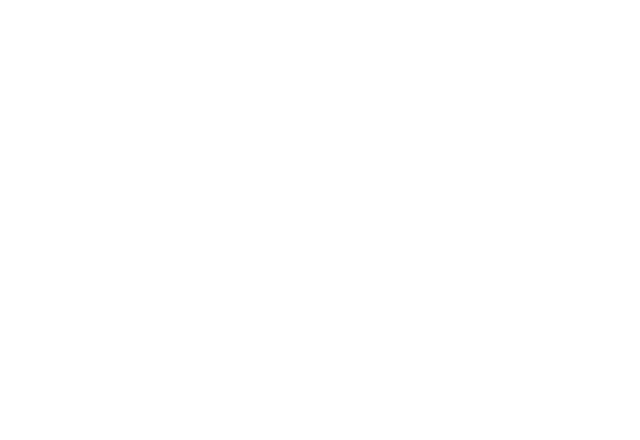

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f54529f8410>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f54b9639290>], dtype=object)

In [131]:
df = pd.DataFrame({'probability':y_pred_prob, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)

In [132]:
nullmodel2_scores = cross_val_score(nullmodel2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nullmodel2_scores

0.858392630112


### MODEL 2: Naive-Bayes

### MODEL 2: Naive-Bayes - Multinomial Naive Bayes

In [133]:
import time
start = time.time()

from sklearn.naive_bayes import MultinomialNB
nbm2 = MultinomialNB()
nbm2.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nbm2_scores = cross_val_score(nbm2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
nbmtime2 = end - start
print nbmtime2

1.80610704422


In [134]:
nbm2_scores_mean = cross_val_score(nbm2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbm2_scores_mean

0.796555459797


### MODEL 2: Naive-Bayes - Gaussian Naive Bayes

In [135]:
#import time
#start = time.time()

#from sklearn.naive_bayes import GaussianNB
#nbg2 = GaussianNB()
#nbg2.fit(X, y)
#nbg2_scores = cross_val_score(nbg2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
#print nbg2_scores

#end = time.time()
#nbgtime2 = end - start
#print nbgtime2

In [136]:
#nbg2_scores_mean = cross_val_score(nbg2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
#print nbg2_scores_mean

### MODEL 2: Naive-Bayes - Bernoulli Naive Bayes

In [137]:
import time
start = time.time()

from sklearn.naive_bayes import BernoulliNB
nbb2 = BernoulliNB()
nbb2.fit(X, y)
BernoulliNB(alpha=1.0, class_prior=None, fit_prior=True)
nbb2_scores = cross_val_score(nbb2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print nbb2_scores

end = time.time()
nbbtime2 = end - start
print nbbtime2

[ 0.806831    0.80940873  0.79942001  0.81536974  0.8126309   0.7878202
  0.80567193  0.79745408  0.8167902   0.79278118]
2.92319393158


In [138]:
nbb2_scores_mean = cross_val_score(nbb2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbb2_scores_mean

0.804418026055


### MODEL3: KNN

In [139]:
knn2 = KNeighborsClassifier(n_neighbors=9)
#strongy = data1.FelRecidYr3
knn2.fit(X,y)
knn2_scores = cross_val_score(knn2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print knn2_scores

[ 0.84984695  0.86128565  0.85000806  0.85387466  0.85306912  0.85339133
  0.85046729  0.85256204  0.85949082  0.85884628]


In [140]:
# use average accuracy as an estimate of out-of-sample accuracy
print knn2_scores.mean()


0.854284217278


In [141]:
# search for an optimal value of K for KNN
#k2_range = range(1, 10)
#k2_scores = []
#for k in k2_range:
#    knn2 = KNeighborsClassifier(n_neighbors=k)
#    knn2_scores = cross_val_score(knn2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
#    k2_scores.append(knn2_scores.mean())
#print knn2_scores

In [142]:
#import matplotlib
#%matplotlib nbagg

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
#plt.plot(k2_range, k2_scores)
#plt.xlabel('Value of K for KNN')
#plt.ylabel('Cross-Validated Accuracy')

### MODEL3: KNN - Re-run KNN model with optimized K = 40

In [143]:
import time
start = time.time()
knn2 = KNeighborsClassifier(n_neighbors=40)
knn2_scores = cross_val_score(knn2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
knntime2 = end - start
print knntime2

513.990171909


In [144]:
print knn2_scores

[ 0.85741904  0.85548574  0.8604801   0.85999678  0.85919124  0.85758015
  0.8617467   0.85771834  0.85965195  0.85465678]


In [145]:
knn_mean2 = cross_val_score(knn2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

In [146]:
import math
mean_score = knn2_scores.mean()
std_dev = knn2_scores.std()
std_error = knn2_scores.std() / math.sqrt(knn2_scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.858393 +/-  0.001515
95 percent probability that if this experiment were repeated over and over the average score would be between 0.856877 and 0.859908


### MODEL 4: Logistic Regression

#### MODEL 4: Logistic Regression - 10-fold cross-validation with logistic regression

In [147]:
import time
start = time.time()

from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression()
logreg2.fit(X,y)
logreg2_scores = cross_val_score(logreg2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

end = time.time()
logregtime2 = end - start
print logregtime2

9.24140620232


In [148]:
logreg2_mean_scores = cross_val_score(logreg2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

In [149]:
print logreg2_mean_scores

0.858392720973


#### MODEL 4: Logistic Regression - Print Logistic Regression cross validation auc score - mean

In [150]:
mean_score = logreg2_scores.mean()
std_dev = logreg2_scores.std()
std_error = logreg2_scores.std() / math.sqrt(logreg2_scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.858393 +/-  0.001898
95 percent probability that if this experiment were repeated over and over the average score would be between 0.856495 and 0.860291


### MODEL 5: SVM Polynomial Kernel

#### MODEL 5: SVM Polynomial Kernel - 10-fold cross-validation with SVM Poly

In [151]:
# 10-fold cross-validation with SVM Polynomial
from sklearn import svm
svmpoly2 = svm.SVC(kernel='poly', gamma=2)
svmpoly2.fit(X,y)
svmpoly2_scores = cross_val_score(svmpoly2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print svmpoly2_scores

[ 0.14515869  0.14241985  0.14741421  0.13307556  0.13742549  0.1414532
  0.14179826  0.1382533   0.14453754  0.14453754]


#### MODEL 5: SVM Polynomial Kernel - Search for an optimal gamma/depth for SVM Polynomial

In [152]:
# search for an optimal gamma for SVM Polynomial
g_range = range(1, 10)
g_scores = []
for k in g_range:
    svmpoly = svm.SVC(kernel='poly', gamma=k)
    scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    g_scores.append(scores.mean())
print g_scores

[0.14160730239127375, 0.14160727123914496, 0.14160707653834015, 0.14160730498728447, 0.14160761131655072, 0.14160718816680157, 0.14160734133143471, 0.14160732056334888, 0.14160752824420733]


In [153]:
import matplotlib
%matplotlib nbagg

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(g_range, g_scores)
plt.xlabel('Gamma for SVM Polynomial')
plt.ylabel('Cross-Validated Accuracy')

<IPython.core.display.Javascript object>

#### MODEL 5: SVM Polynomial Kernel - Optimized

In [154]:
import time
start = time.time()

from sklearn import svm
svmpoly2 = svm.SVC(kernel='poly', gamma=9)
svmpoly2.fit(X,y)
svmpoly2_scores = cross_val_score(svmpoly2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
svmpolytime2 = end - start
print svmpolytime2

4.42000794411


In [ ]:
svmpoly2_mean_scores = svmpoly2_scores
print svmpoly2_mean_scores

0.141607458152


### MODEL 5: SVM Gaussian Kernel

In [ ]:
from sklearn import svm
svmrbf = svm.SVC(kernel='rbf', gamma=2)
svmrbf.fit(X,y)
svmrbf2_scores = cross_val_score(svmrbf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

In [ ]:
svmrbf2_mean_scores = svmrbf2_scores.mean()

In [ ]:
import matplotlib
%matplotlib nbagg

plt.plot(g_range, g_scores)
plt.xlabel('Gamma for SVM Gaussian')
plt.ylabel('Cross-Validated Accuracy')

### MODEL 6: Decision Tree

#### MODEL 6: Decision Tree - Initial Decision Tree with max depth of 10

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(X,y)
clf2_scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

#### MODEL 6: Decision Tree - Print Decision Tree cross validation accuracy scores

In [ ]:
print clf2_scores

#### MODEL 6: Decision Tree -  Print Decision Tree cross validation accuracy score - mean

In [ ]:
clf2_scores_mean = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print clf2_scores_mean

#### MODEL 6: Decision Tree - Save and print graphic of Decision Tree

In [ ]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

In [ ]:
graph.write_jpeg("hw3_tree_plot.jpg")

In [ ]:
from IPython.display import Image
Image(filename='hw3_tree_plot.jpg')

### MODEL 6: Decision Tree - search for an optimal gamma/depth for Decision Tree

In [ ]:
t_range = range(1, 20)
t_scores = []
for k in t_range:
    clf = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    t_scores.append(scores.mean())
print t_scores

### MODEL 6: Decision Tree - Plot accuracy of cross validation runs vs. values of depth

In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(t_range, t_scores)
plt.xlabel('Value of Depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

### MODEL 6: Decision Tree with optimized results for max depth

In [ ]:
import time
start = time.time()

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=45)
clf.fit(X,y)
clf_mean2 = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
clftime2 = end - start
print clftime2

### MODEL 7: Bootstrap Aggregation using Decision Tree

In [ ]:
bag_scores = []

bag_range = range(1, 50)

for k in bag_range:
    bag_clf = BaggingClassifier(clf, n_estimators=k, max_samples=1.0, max_features=5, bootstrap = False, bootstrap_features = True, random_state=42)
    bag_clf.fit(X, y)
    bag_clf2_scores = cross_val_score(bag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    bag_scores.append(bag_clf2_scores.mean())
print bag_clf2_scores

In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(bag_range, bag_scores)
plt.xlabel('max_depth')
plt.ylabel('Cross validated accuracy')

## MODEL 7: Bootstrap aggregation using Decision Tree - optimized

In [ ]:
import time
start = time.time()

bag_clf2 = BaggingClassifier(clf, n_estimators=k, max_samples=1.0, max_features=5, bootstrap = False, bootstrap_features = True, random_state=42)
bag_clf2.fit(X, y)
bag_clf2_scores = cross_val_score(bag_clf2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
bagclftime2 = end - start
print bagclftime2

### MODEL 8: Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, oob_score=False, random_state=42)
rf.fit(X, y)
rf2_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

In [ ]:
print rf2_scores

In [ ]:
print rf2_scores.mean()

### MODEL 8: Random Forest - Determine optimal depth for Random Forest

In [ ]:
t_range = range(1, 50)
t_scores = []
for k in t_range:
    clf = RandomForestClassifier(max_depth=k)
    scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    t_scores.append(scores.mean())
print t_scores

In [ ]:
import matplotlib
%matplotlib nbagg
plt.plot(t_range, t_scores)
plt.xlabel('Max Depth')
plt.ylabel('Cross Validated Accuracy')

### MODEL 8: Random Forest - optimize for max number of features

In [ ]:
import matplotlib
%matplotlib nbagg

results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=10, oob_score=False, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    roc = cross_val_score(model, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    print max_features, "option"
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.84,.89));

### MODEL 8: Re-Run Random Forest after optimization of all hyperparameters

In [ ]:
import time
start = time.time()
#-removed oob score below
rf2 = RandomForestClassifier(n_estimators=60, max_features='auto', max_depth=50, min_samples_leaf=10, random_state=42)
rf2.fit(X, y)
rf_mean2 = cross_val_score(rf2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
rftime2 = end - start
print rftime2

## MODEL 8a: Bagged Random Forest (using optimized parameters from above)

In [ ]:
rfbag_scores = []

rfbag_range = range(1, 50)

for k in bag_range:
    rfbag_clf2 = RandomForestClassifier(n_estimators=60, max_features='auto', max_depth=50,  oob_score=False, min_samples_leaf=10, random_state=42)
    rfbag_clf2.fit(X, y)
    rfbag_clf2_scores = cross_val_score(rfbag_clf2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    rfbag_scores.append(rfbag_clf2_scores.mean())
print rfbag_clf2_scores

In [ ]:
import matplotlib
%matplotlib nbagg
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(rfbag_range, rfbag_scores)
plt.xlabel('N estimators')
plt.ylabel('Cross Validated Accuracy')

## MODEL 8a: Re-running bagged Random Forest - optimized

In [ ]:
import time
start = time.time()

rfbag_clf2 = RandomForestClassifier(n_estimators=60, max_features=.2, max_depth=50,  oob_score=False, min_samples_leaf=10, random_state=42)
rfbag_clf2.fit(X, y)
rfbag_clf2_scores = cross_val_score(rfbag_clf2, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

end = time.time()
rfbagtime2 = end - start
print rfbagtime2

# STEP 4: RESULTS! - all data

### Summary ROCs for all models - DATA2 - RECIDIVISM

In [ ]:
# TASK 7: plot the ROC curve
import matplotlib
%matplotlib nbagg
from sklearn import metrics
import pandas as pd
from ggplot import *

nullmodel_preds = nullmodel.predict_proba(X_test)[:,1]
nullmodel_fpr, nullmodel_tpr, _ = metrics.roc_curve(y_test, nullmodel_preds)

knn.fit(X,y)
knn_preds = knn.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, _ = metrics.roc_curve(y_test, knn_preds)

nbm_preds = nbm.predict_proba(X_test)[:,1]
nbm_fpr, nbm_tpr, _ = metrics.roc_curve(y_test, nbm_preds)

nbg_preds = nbg.predict_proba(X_test)[:,1]
nbg_fpr, nbg_tpr, _ = metrics.roc_curve(y_test, nbg_preds)

nbb_preds = nbb.predict_proba(X_test)[:,1]
nbb_fpr, nbb_tpr, _ = metrics.roc_curve(y_test, nbb_preds)

logreg_preds = logreg.predict_proba(X_test)[:,1]
logreg_fpr, logreg_tpr, _ = metrics.roc_curve(y_test, logreg_preds)

clf.fit(X,y)
clf_preds = clf.predict_proba(X_test)[:,1]
clf_fpr, clf_tpr, _ = metrics.roc_curve(y_test, clf_preds)

bag_clf_preds = bag_clf.predict_proba(X_test)[:,1]
bag_fpr, bag_tpr, _ = metrics.roc_curve(y_test, bag_clf_preds)

rfbag_clf_preds = rfbag_clf.predict_proba(X_test)[:,1]
rfbag_clf_fpr, rfbag_clf_tpr, _ = metrics.roc_curve(y_test, rfbag_clf_preds)

etree.fit(X,y)
etree_preds = etree.predict_proba(X_test)[:,1]
etree_fpr, etree_tpr, _ = metrics.roc_curve(y_test, etree_preds)

plt.plot(nullmodel_fpr, nullmodel_tpr, label='Null', color='gray') # KNN
plt.plot(knn_fpr, knn_tpr, label='KNN', color='blue') # KNN
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression', color='red') # Logistic Regression
plt.plot(nbm_fpr, nbm_tpr, label='Naive Bayes Multinomial', color='green') # Naive Bayes Multinomial
plt.plot(nbg_fpr, nbg_tpr, label='Naive Bayes Gaussian', color='magenta') # Naive Bayes Gaussian
plt.plot(nbb_fpr, nbb_tpr, label='Naive Bayes Bernoulli', color='yellow') # Naive Bayes Bernoulli
plt.plot(clf_fpr, clf_tpr, label='Decision Tree', color='orange') # Decision Tree
plt.plot(bag_fpr, bag_tpr, label='Bagged Decision Tree', color='black') # Bagged Decision Tree
plt.plot(rfbag_clf_fpr, rfbag_clf_tpr, label='Bagged Random Forest', color='brown') #Bagged Random Forest
plt.plot(etree_fpr, etree_tpr, label='Extra Tree', color='sea green') #Extra Tree


plt.legend()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



## Plot time and cv - Recidivism

In [ ]:
name = ['null', 'Naive Bayes Mult', 'Naive Bayes Gaussian', 'Naive Bayes Bernoulli', 'SVM Poly', 'SVM Gaussian', 'Tree', 'Bagged Tree', 'Bagged RF', 'Etra Trees Classifier']

In [ ]:
time1 = [nulltime1, nbmtime1, nbgtime1, nbbtime1, logregtime1, svmpolytime1, svmgaustime1, clftime1, bagclftime1, rfbagtime1, ettime1]
cv1 = [nullmodel_mean1, nbm_scores_mean1, nbg_scores_mean1, nbb_scores_mean1, knn_scores_mean1, svmpoly_mean1, svmrbf_scores, clf_mean1, bag_clf_scores, rfbag_clf_scores, et_scores]

In [ ]:
options = dict(height=400, title=dict(text='MUSIC Dataset: Time'))
charts.plot(time1, options=options, name='Music time data', save='temp.svg', show='inline')

In [ ]:
options = dict(height=400, title=dict(text='MUSIC Dataset: Time'))
charts.plot(cv1, options=options, name='Music time data', save='temp.svg', show='inline')

## Model Time - Recidivism

In [ ]:
seriestime1 = pd.Series(time1, name)
print seriestime1

## Cross Validation Accuracy - Recidivism

In [ ]:
seriescv1 = pd.Series(cv1, name)
print seriescv1

### Summary ROCs for all models - DATA2 - MUSIC

In [ ]:
# TASK 7: plot the ROC curve
import matplotlib
%matplotlib nbagg
from sklearn import metrics
import pandas as pd
from ggplot import *

X_train, X_test, y_train, y_test = train_test_split(Xmusic, ymusic, random_state=99)

nullmodel2.fit(X,y)
nullmodel2_preds = nullmodel2.predict_proba(X_test)[:,1]
nullmodel2_fpr, nullmodel_tpr, _ = metrics.roc_curve(y_test, nullmodel2_preds)

knn2_preds = knn2.predict_proba(X_test)[:,1]
knn2_fpr, knn2_tpr, _ = metrics.roc_curve(y_test, knn2_preds)

nbm2_preds = nbm2.predict_proba(X_test)[:,1]
nbm2_fpr, nbm2_tpr, _ = metrics.roc_curve(y_test, nbm2_preds)

nbg2_preds = nbg2.predict_proba(X_test)[:,1]
nbg2_fpr, nbg2_tpr, _ = metrics.roc_curve(y_test, nbg2_preds)

nbb2_preds = nbb2.predict_proba(X_test)[:,1]
nbb2_fpr, nbb2_tpr, _ = metrics.roc_curve(y_test, nbb2_preds)

logreg2_preds = logreg2.predict_proba(X_test)[:,1]
logreg2_fpr, logreg2_tpr, _ = metrics.roc_curve(y_test, logreg2_preds)

clf2_preds = clf2.predict_proba(X_test)[:,1]
clf2_fpr, clf2_tpr, _ = metrics.roc_curve(y_test, clf2_preds)

bag_clf2_preds = bag_clf2.predict_proba(X_test)[:,1]
bag_clf2_fpr, bag_clf2_tpr, _ = metrics.roc_curve(y_test, bag_clf2_preds)

rf2_preds = rf2.predict_proba(X_test)[:,1]
rf2_fpr, rf2_tpr, _ = metrics.roc_curve(y_test, rf2_preds)

rfbag_clf2_preds = rfbag_clf2.predict_proba(X_test)[:,1]
rfbag_clf2_fpr, rfbag_clf2_tpr, _ = metrics.roc_curve(y_test, rfbag_clf2_preds)

etree2_preds = etree2.predict_proba(X_test)[:,1]
etree2_fpr, etree2_tpr, _ = metrics.roc_curve(y_test, etree2_preds)

plt.plot(nullmodel2_fpr, nullmodel2_tpr, label='Null', color='gray') # KNN
plt.plot(knn2_fpr, knn2_tpr, label='KNN', color='blue') # KNN
plt.plot(logreg2_fpr, logreg2_tpr, label='Logistic Regression', color='red') # Logistic Regression
plt.plot(nbm2_fpr, nbm2_tpr, label='Naive Bayes Multinomial', color='green') # Naive Bayes Multinomial
plt.plot(nbg2_fpr, nbg2_tpr, label='Naive Bayes Gaussian', color='magenta') # Naive Bayes Gaussian
plt.plot(nbb2_fpr, nbb2_tpr, label='Naive Bayes Bernoulli', color='yellow') # Naive Bayes Bernoulli
plt.plot(clf2_fpr, clf2_tpr, label='Decision Tree', color='orange') # Decision Tree
plt.plot(bag_clf2_fpr, bag_clf2_tpr, label='Bagged Decision Tree', color='black') # Bagged Decision Tree
plt.plot(rf2_fpr, rf2_tpr, label='Bagged Random Forest', color='brown') #Random Forest
plt.plot(rfbag_clf2_fpr, rfbag_clf2_tpr, label='Bagged Random Forest', color='brown') #Bagged Random Forest
plt.plot(etree2_fpr, etree2_tpr, label='Extra Tree', color='sea green') #Extra Tree



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')




## Plot time and cv - Music

In [ ]:
time2 = [nulltime2, nbmtime2, nbgtime2, nbbtime2, logregtime2, svmpolytime2, svmgaustime2, clftime2, bagtime2, rftime2, ettree2]
cv2 = [nullmodel_mean2, nbm_scores_mean2, nbg_scores_mean2, nbb_scores_mean2, knn_scores_mean2, svmpoly_mean2, svmgaus_mean2, clf_mean2, bagclf_mean2, rf_mean2, et_mean2]

In [ ]:
seriestime2 = pd.Series(time2, name)
print seriestime2

In [ ]:
seriescv2 = pd.Series(cv2, name)
print seriescv2

In [ ]:
options = dict(height=400, title=dict(text='MUSIC Dataset: Time'))
charts.plot(time2, options=options, name='Music time data', save='temp.svg', show='inline')

## Model Time - Music

In [ ]:
seriestime1 = pd.Series(time1, name)
print seriestime1

## Cross Validation Accuracy - Music

In [ ]:
seriescv1 = pd.Series(cv1, name)
print seriescv1